![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [69]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv(r"C:\Users\moatz\Desktop\New folder (5)\workspace (10)\git hub\penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [70]:
penguins_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [71]:
cat = [var for var in penguins_df.columns if penguins_df[var].dtype=='O']
cat

['sex']

In [72]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [73]:
penguins_df['sex']=label.fit_transform(penguins_df['sex'])

In [74]:
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,0
328,46.8,14.3,215.0,4850.0,0
329,50.4,15.7,222.0,5750.0,1
330,45.2,14.8,212.0,5200.0,0


In [53]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()

penguins_df=stand.fit_transform(penguins_df)

In [78]:
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,0
328,46.8,14.3,215.0,4850.0,0
329,50.4,15.7,222.0,5750.0,1
330,45.2,14.8,212.0,5200.0,0


In [79]:

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(penguins_df)
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(penguins_df)

In [80]:
import pandas as pd

inputs_scaled = pd.DataFrame(scaler.transform(penguins_df), columns=penguins_df.columns)


In [81]:
pd.DataFrame(inputs_scaled)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994
...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,-1.006042
328,0.510432,-1.457611,1.000662,0.799264,-1.006042
329,1.171681,-0.742347,1.500134,1.917074,0.993994
330,0.216543,-1.202160,0.786603,1.233968,-1.006042


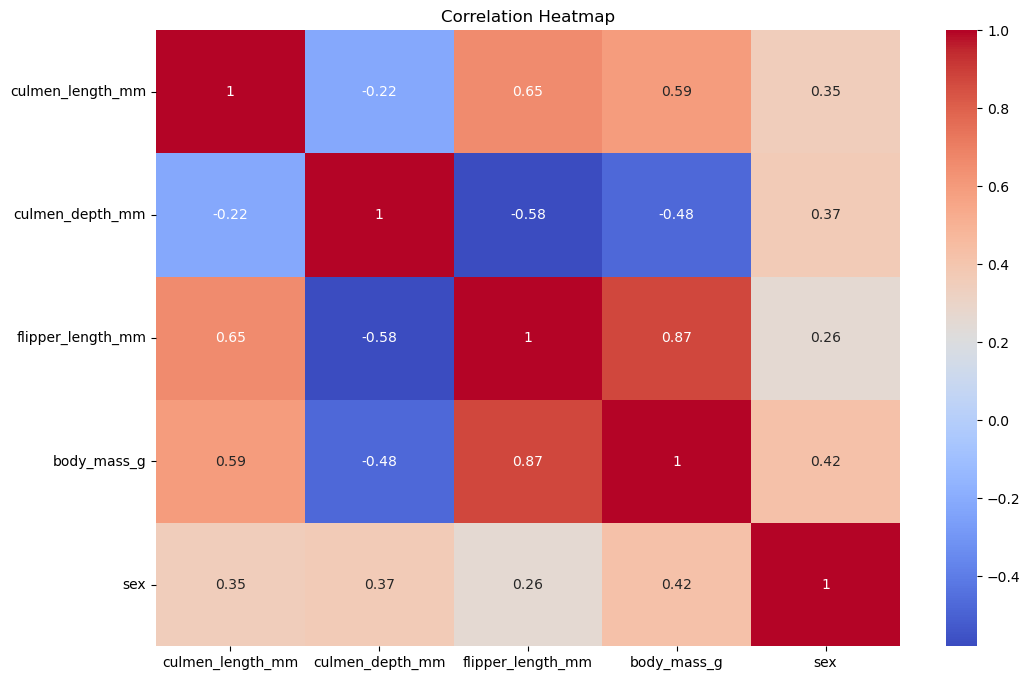

In [82]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure penguins_df is a DataFrame
import pandas as pd
inputs_scaled = pd.DataFrame(inputs_scaled)

plt.figure(figsize=(12, 8))
sns.heatmap(penguins_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [150]:
x=inputs_scaled.iloc[:,0:5]

In [151]:
print(type(x))
print(x[:5])

<class 'pandas.core.frame.DataFrame'>
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g       sex
0         -0.903906         0.790360          -1.425342    -0.566948  0.993994
1         -0.830434         0.126187          -1.068577    -0.504847 -1.006042
2         -0.683490         0.432728          -0.426399    -1.187953 -1.006042
3         -1.344738         1.096901          -0.569105    -0.939551 -1.006042
4         -0.867170         1.761074          -0.783164    -0.691149  0.993994


In [152]:
x=x.values

In [153]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=2,min_samples=2,metric='euclidean')

In [154]:
model=db.fit(x)

In [155]:
label=model.labels_

In [156]:
label

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [157]:
from sklearn import metrics

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 2


In [158]:
y_means = db.fit_predict(x)

In [159]:
y_means == 0, 0

(array([ True, False, False, False,  True, False,  True, False,  True,
        False, False,  True, False,  True, False,  True, False,  True,
         True, False,  True, False, False,  True, False,  True, False,
         True, False,  True,  True, False, False,  True, False,  True,
        False,  True, False,  True,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True,  True, False,
         True, False, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
      

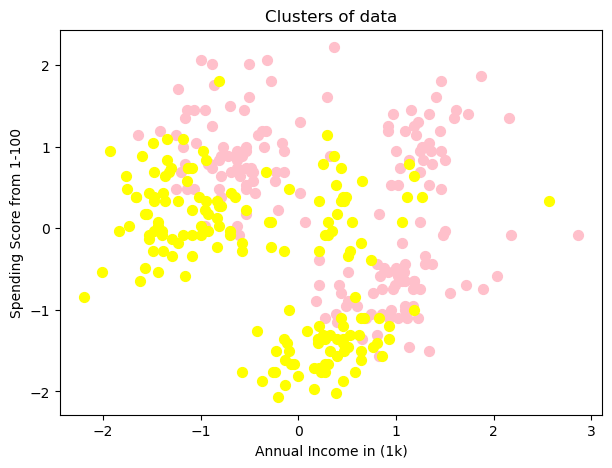

In [160]:
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()



In [161]:
# Automatic code for selecting the best value of min samples and epslon based on siheoute score

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Range of epsilon and min_samples to explore
eps_range = np.arange(2, 15, 1)
min_samples_range = np.arange(2, 15, 1)

best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
  for min_samples in min_samples_range:
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    model = db.fit(x)
    labels = model.labels_

    # Ignore cases where all points are noise
    if len(set(labels)) > 1:
      silhouette_score = metrics.silhouette_score(x, labels)
      if silhouette_score > best_score:
        best_score = silhouette_score
        best_eps = eps
        best_min_samples = min_samples

print("Best Silhouette Score:", best_score)
print("Best Epsilon:", best_eps)
print("Best Min Samples:", best_min_samples)


Best Silhouette Score: 0.3188172031208849
Best Epsilon: 2
Best Min Samples: 2


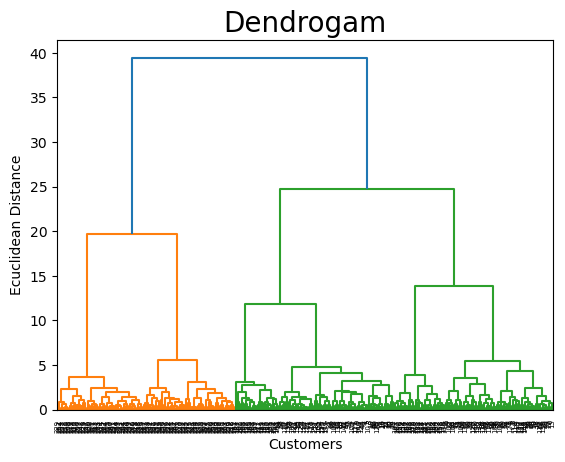

In [162]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


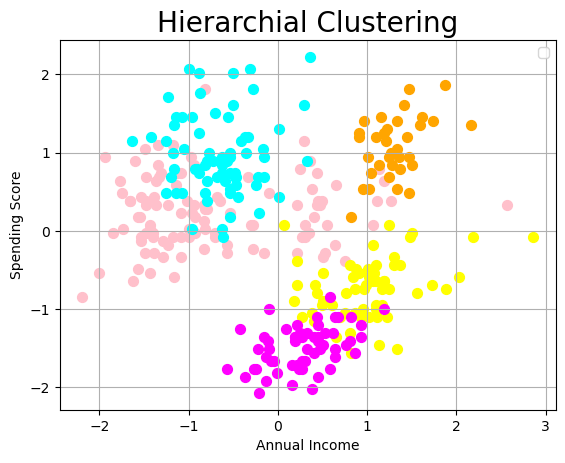

In [163]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_hc == 6, 0], x[y_hc == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 7, 0], x[y_hc == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_hc == 8, 0], x[y_hc == 8, 1], s = 50, c = 'violet')


plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

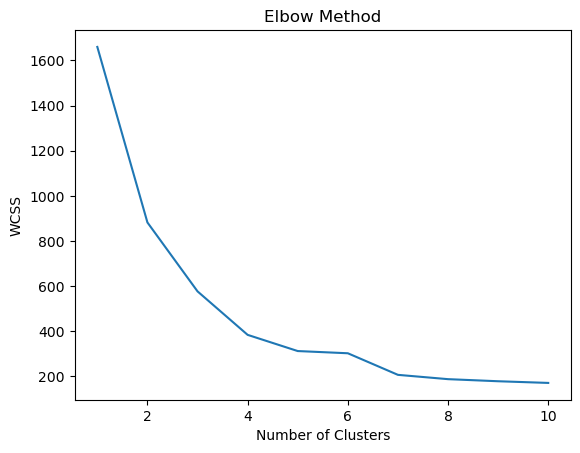

In [164]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


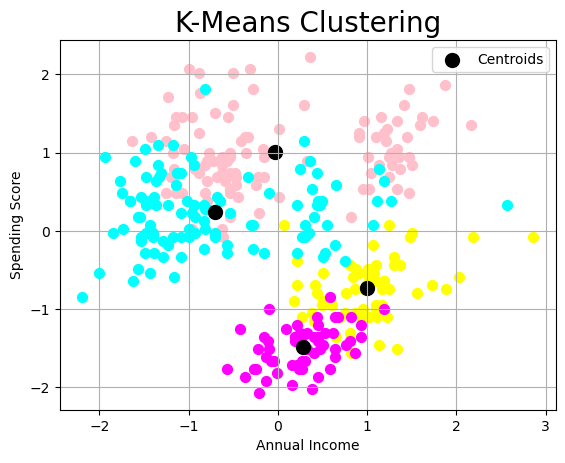

In [177]:
# Based on the Elbow method, choose the optimal number of clusters (let's say 5)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

# Visualize the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=50, c='pink')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=50, c='yellow')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=50, c='cyan')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=50, c='magenta')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()



In [178]:
from sklearn.metrics import silhouette_score

# Example usage:
score = silhouette_score(x, kmeans.labels_)
score

0.5085922485155359